## Working with Datetime Data

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [59]:
dates = pd.date_range(start='2024-01-01', end='2024-01-07 23:00:00', freq = 'h')
print(f"Created {len(dates)} hourly timestamps")
print(f"First: {dates[0]}")
print(f"Last: {dates[-1]}")

Created 168 hourly timestamps
First: 2024-01-01 00:00:00
Last: 2024-01-07 23:00:00


In [60]:
# Generate simple load data with daily pattern
hours = np.arange(len(dates))
daily_pattern = 500 + np.sin((hours%24)*2*np.pi/24 - np.pi/2)
noise = np.random.normal(0, 10, len(dates))
load = daily_pattern + noise

# create DataFrame
df = pd.DataFrame({
    'load': load
    }, index = dates
)
df.head()

,load
2024-01-01 00:00:00,505.323697
2024-01-01 01:00:00,509.203230
2024-01-01 02:00:00,494.824896
2024-01-01 03:00:00,509.750659
2024-01-01 04:00:00,491.988457


In [61]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_name()
df['date'] = df.index.date


In [62]:
# show a few rows
df[['load','hour','day_of_week']].head()

,load,hour,day_of_week
2024-01-01 00:00:00,505.323697,0,Monday
2024-01-01 01:00:00,509.203230,1,Monday
2024-01-01 02:00:00,494.824896,2,Monday
2024-01-01 03:00:00,509.750659,3,Monday
2024-01-01 04:00:00,491.988457,4,Monday


In [63]:
jan_3 = df.loc['2024-01-03']
print(f"January 3rd has {len(jan_3)} hours of data")
print(f"Peak load: {jan_3['load'].max():.1f} MW at hour {jan_3['load'].idxmax().hour}")

January 3rd has 24 hours of data
Peak load: 522.2 MW at hour 3


## Basic Time Series Operations

### Resampling: Changing Time Frequency

In [64]:
# resample hourly to daily
daily = df['load'].resample('D').agg({
    'mean':'mean',
    'max':'max',
    'min':'min'
})
daily

,mean,max,min
2024-01-01,497.777687,512.247803,478.984422
2024-01-02,502.380230,522.670659,485.373976
2024-01-03,501.801036,522.240849,477.876202
2024-01-04,497.304707,520.871119,478.016914
2024-01-05,501.788759,526.187581,476.276001
2024-01-06,503.229397,523.964949,487.331277
2024-01-07,497.392790,515.370674,477.158868


### Rolling Windows and Moving averages

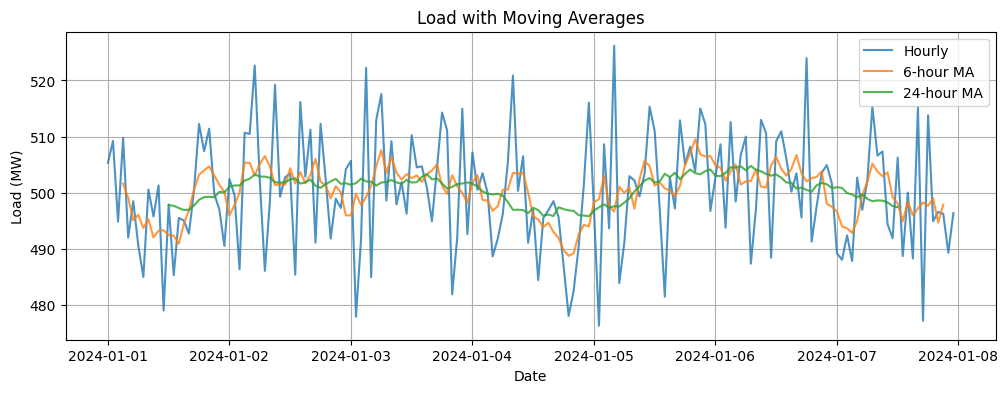

In [65]:
df['ma_6h'] = df['load'].rolling(window=6, center = True).mean()
df['ma_24h'] = df['load'].rolling(window=24, center=True).mean()

# plot original vs smoothed
plt.figure(figsize=(12,4))
plt.plot(df.index, df['load'], alpha = 0.8, label = 'Hourly')
plt.plot(df.index, df['ma_6h'], alpha = 0.8, label = '6-hour MA')
plt.plot(df.index, df['ma_24h'], alpha = 0.8, label = '24-hour MA')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.title('Load with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

### Calculating Changes and growth Rates

In [ ]:
# calculate hour to hour change
df['change'] = df['load'].diff()
df['pct_change'] = df['load'].pct_change() * 100

# find largest changes
max_increase = df['change'].max()
max_decrease